In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np

task_map = {'Quantity':1,'MeasuredProperty':2,'MeasuredEntity':3,'Qualifier':4, 'Unit':5}

In [2]:
currentdir = os.getcwd() # ~/MeasEval/baselines

datapath = os.path.join(currentdir,'data/output/')

interimpath = os.path.join(currentdir, "data/interim/")

rb_base_path = os.path.join(datapath+'final_roberta-base_bs-8_lr-7e-05_drop-0.022/')
rb_bio_path = os.path.join(datapath+'final_biomed_roberta_base_bs-8_lr-7e-05_drop-0.022/')
rb_cs_path = os.path.join(datapath+'final_cs_roberta_base_bs-8_lr-7e-05_drop-0.022/')

In [3]:
base_test = pd.read_csv(rb_base_path+'test_set_metrics')
bio_test = pd.read_csv(rb_bio_path+'test_set_metrics')
cs_test = pd.read_csv(rb_cs_path+'test_set_metrics')

base_test['model'] = 'bio Roberta'
bio_test['model'] = 'Biomed Roberta'
cs_test['model'] = 'CS Roberta'

test_metrics = pd.concat([base_test, bio_test, cs_test],ignore_index=True).rename(columns={'Unnamed: 0':'epoch'})

test_metrics.loc[0]

epoch                                   0
Quantity_precision               0.573843
Quantity_recall                  0.697945
Quantity_f1-score                0.629839
Quantity_support                     1119
MeasuredProperty_precision            0.0
MeasuredProperty_recall               0.0
MeasuredProperty_f1-score             0.0
MeasuredProperty_support              715
MeasuredEntity_precision              0.0
MeasuredEntity_recall                 0.0
MeasuredEntity_f1-score               0.0
MeasuredEntity_support               1206
Qualifier_precision                   0.0
Qualifier_recall                      0.0
Qualifier_f1-score                    0.0
Qualifier_support                     457
Unit_precision                        0.0
Unit_recall                           0.0
Unit_f1-score                         0.0
Unit_support                          543
wt_f1                            0.174453
model                         bio Roberta
Name: 0, dtype: object

In [4]:
# test_metrics

In [5]:
set(test_metrics['model'].values)

{'Biomed Roberta', 'CS Roberta', 'bio Roberta'}

In [6]:

for task, taskid in task_map.items():
    task_scores = test_metrics[['epoch','model',task+'_f1-score']]
    for model in set(test_metrics['model'].values):
        label = model
        epoch = task_scores[task_scores['model']==model]['epoch'].values
        metric = task_scores[task_scores['model']==model][task+'_f1-score'].values
        
    

In [7]:
task_f1s = [t+'_f1-score' for t in list(task_map.keys())]

task_f1s.append('wt_f1')

print(task_f1s)


['Quantity_f1-score', 'MeasuredProperty_f1-score', 'MeasuredEntity_f1-score', 'Qualifier_f1-score', 'Unit_f1-score', 'wt_f1']


[0, 0, 1, 1, 2, 2] [0, 1, 0, 1, 0, 1]


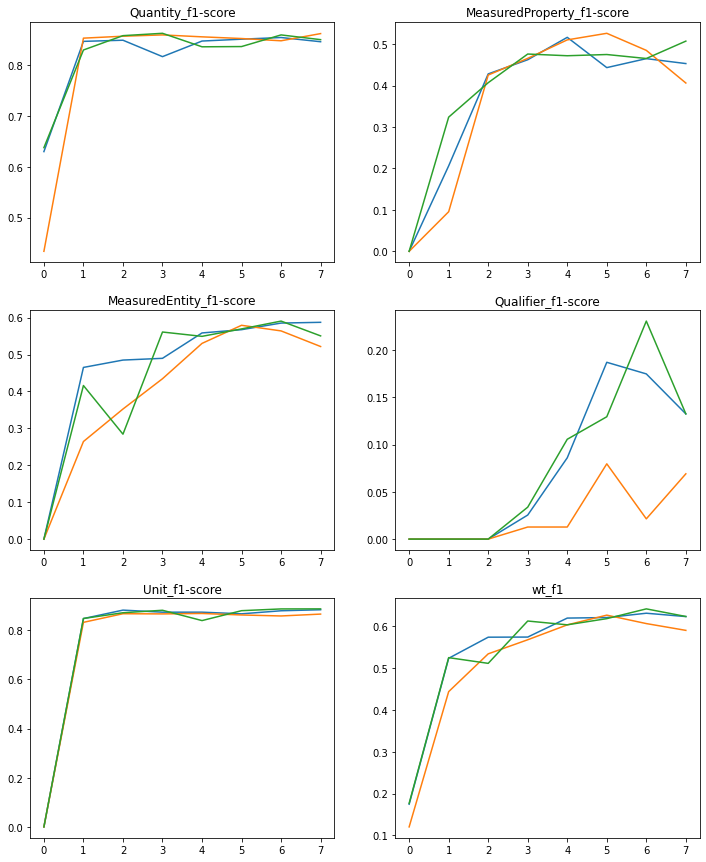

In [8]:
nrows = 3
ncols = 2
fig,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(12,15))

task_f1s = [t+'_f1-score' for t in list(task_map.keys())]

task_f1s.append('wt_f1')

r_ = []
c_ = []
for r in range(nrows):
    for c in range(ncols):
        r_.append(r)
        c_.append(c)
print(r_,c_)

for metric_name, r, c in zip(task_f1s, r_, c_):
    task_scores = test_metrics[['epoch','model',metric_name]]
    for model in set(test_metrics['model'].values):
        label = model
        epoch = task_scores[task_scores['model']==model]['epoch'].values
        metric = task_scores[task_scores['model']==model][metric_name].values
        ax[r,c].plot(epoch,metric,label=label)
        ax[r,c].title.set_text(metric_name)





plt.show()

In [9]:
doc_categories = pd.read_csv(currentdir+'/fileCategories.txt',sep='\t',header=None,names=['doc','category'])

doc_categories = dict(zip(doc_categories['doc'],doc_categories['category']))
# doc_categories

In [10]:
doc_categories

{'S1161030113001950': 'Agriculture',
 'S0261219413001944': 'Agriculture',
 'S037842901300244X': 'Agriculture',
 'S0167880913001229': 'Agriculture',
 'S0038071711004354': 'Agriculture',
 'S0038071712001010': 'Agriculture',
 'S0254629913003086': 'Agriculture',
 'S0168945213001805': 'Agriculture',
 'S0031405612000728': 'Agriculture',
 'S0378112713005288': 'Agriculture',
 'S0038071713001971': 'Agriculture',
 'S0032063312002437': 'Astronomy',
 'S0019103512004009': 'Astronomy',
 'S0032063313003218': 'Astronomy',
 'S0019103512003995': 'Astronomy',
 'S0019103513005058': 'Astronomy',
 'S0032063312003054': 'Astronomy',
 'S0019103511004994': 'Astronomy',
 'S0019103512002801': 'Astronomy',
 'S0019103512003533': 'Astronomy',
 'S0032063312000487': 'Astronomy',
 'S0019103512001388': 'Astronomy',
 'S016816561300552X': 'Biology',
 'S2213671113001288': 'Biology',
 'S2213671113000672': 'Biology',
 'S2213671113000738': 'Biology',
 'S2213671113000921': 'Biology',
 'S2211124713006475': 'Biology',
 'S2213671

In [11]:
with open('./data/interim/combo_txt.json','r') as f:
    combo_txt = json.load(f)

cat_counts = {}
for doc in combo_txt.keys():
    fulldoc = doc.split('-')[0]
    cat = doc_categories[fulldoc]
    if cat == 'Mathematics': print(f'outlier math doc is {doc}')
    try: cat_counts[cat] += 1
    except: cat_counts[cat] = 1

# return(cat_counts)


print(pd.DataFrame.from_dict(cat_counts,orient='index',columns=['n_doc']))

outlier math doc is S0167278913001450-12425
                   n_doc
Medicine              54
Earth Science         48
Chemistry             49
Astronomy             86
Computer Science      32
Agriculture           38
Materials Science     38
Mathematics            1
Engineering           55
Biology               47


In [12]:
sum(cat_counts.values())

448

In [13]:
def cat_doc_counts(doc_list_path):
    with open(doc_list_path,'r') as f:
        train_docs = json.load(f)

    # print(test_docs)

    cat_counts = {}
    for doc in train_docs:
        fulldoc = doc.split('-')[0]
        cat = doc_categories[fulldoc]
        try: cat_counts[cat] += 1
        except: cat_counts[cat] = 1
    
    # return(cat_counts)


    print(pd.DataFrame.from_dict(cat_counts,orient='index',columns=['n_doc']))

cat_doc_counts('./data/interim/train_docs.json')
cat_doc_counts('./data/interim/dev_docs.json')
cat_doc_counts('./data/interim/test_docs.json')

                   n_doc
Medicine              33
Earth Science         26
Chemistry             21
Astronomy             32
Computer Science      24
Agriculture           24
Materials Science     20
Engineering           32
Biology               36
                  n_doc
Earth Science        14
Chemistry            17
Astronomy            31
Computer Science      2
Medicine              1
                   n_doc
Earth Science          8
Chemistry             11
Astronomy             23
Computer Science       6
Medicine              20
Materials Science     18
Agriculture           14
Mathematics            1
Engineering           23
Biology               11


In [14]:
def cat_doc_counts(preds_labs_path):
    with open(preds_labs_path+'/ytrue_by_doc.json','r') as f:
        ytrue = json.load(f)

    cat_counts = {}
    for doc in ytrue.keys():
        fulldoc = doc.split('-')[0]
        cat = doc_categories[fulldoc]
        try: cat_counts[cat] += 1
        except: cat_counts[cat] = 1
    
    return(cat_counts)

print(pd.DataFrame.from_dict(cat_doc_counts(rb_base_path),orient='index',columns=['n_doc']))

                   n_doc
Earth Science          8
Chemistry             11
Astronomy             23
Computer Science       6
Medicine              20
Materials Science     18
Agriculture           14
Mathematics            1
Engineering           23
Biology               11


In [15]:
cm_list = {}

def scores_by_category(preds_labs_path):

    with open(preds_labs_path+'/ypred_by_doc.json','r') as f:
        ypred = json.load(f)
    with open(preds_labs_path+'/ytrue_by_doc.json','r') as f:
        ytrue = json.load(f)

    ypred_by_cat = {    
        'Earth Science':[],
        'Biology':[],
        'Chemistry':[],
        'Mathematics':[],
        'Astronomy':[],
        'Materials Science':[],
        'Medicine':[],
        'Engineering':[],
        'Computer Science':[],
        'Agriculture':[]
    }
    ytrue_by_cat = {    
        'Earth Science':[],
        'Biology':[],
        'Chemistry':[],
        'Mathematics':[],
        'Astronomy':[],
        'Materials Science':[],
        'Medicine':[],
        'Engineering':[],
        'Computer Science':[],
        'Agriculture':[]
    }

    for doc in ypred.keys():
        fulldoc = doc.split('-')[0]
        cat = doc_categories[fulldoc]
        ypred_by_cat[cat].extend(ypred[doc])
        ytrue_by_cat[cat].extend(ytrue[doc])

        # print(doc,cat)
        # print(len(ypred_by_cat[cat]))


    scores_by_cat = []
    for cat in set(doc_categories.values()):
        cat_scores = {}
        if cat == 'Mathematics': continue
        cat_report = classification_report(
                    ytrue_by_cat[cat],ypred_by_cat[cat],
                    labels=list(task_map.values()),
                    target_names=list(task_map.keys()),
                    output_dict=True,
                    zero_division=0
                )
        # print(cat_report)
        cat_scores['cat'] = cat
        # print(cat)
        for task, scores in cat_report.items():
            
            # taskname = task.replace(' ','_')
            cat_scores[task.replace(' ','_')+'_f1'] = scores['f1-score']
            cat_scores[task.replace(' ','_')+'_support'] = scores['support']
            # cat_scores['f1'] = scores['f1-score']
            # cat_scores['support'] = scores['support']

        # print(f'\nConfusion matrix for {cat}')
        display_labels = list(task_map.keys())
        display_labels.insert(0,str('NoLabel'))
        # print(display_labels)
        cm = confusion_matrix(ytrue_by_cat[cat],ypred_by_cat[cat],normalize='true')
        # print(cm)
        cm_list[cat] = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
        # plt.xticks(rotation=90)
        # plt.show()
            
        # print(cat_scores)
        scores_by_cat.append(cat_scores)

    return pd.DataFrame.from_dict(scores_by_cat)

rb_base_scores = scores_by_category(rb_base_path)
rb_bio_scores = scores_by_category(rb_bio_path)
rb_cs_scores = scores_by_category(rb_cs_path)

cm_list


{'Earth Science': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0732faad10>,
 'Astronomy': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0733479ba0>,
 'Medicine': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0732fabd90>,
 'Computer Science': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0733f3c160>,
 'Materials Science': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f06a5a87940>,
 'Engineering': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f06a5a86cb0>,
 'Chemistry': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f06a5a86ce0>,
 'Biology': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f06a5a86d10>,
 'Agriculture': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f06a5a86d40>}

In [16]:
tasklabs = list(task_map.keys())

tasklabs.insert(0,str('NoLabel'))

print(tasklabs)

['NoLabel', 'Quantity', 'MeasuredProperty', 'MeasuredEntity', 'Qualifier', 'Unit']


[0, 0, 0, 1, 1, 1, 2, 2, 2] [0, 1, 2, 0, 1, 2, 0, 1, 2]


Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7f06a64b6e60>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 61, in _cb
    callback(self)
  File "/home/sam/.virtualenvs/test/lib/python3.10/site-packages/matplotlib/cbook/__init__.py", line 239, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'


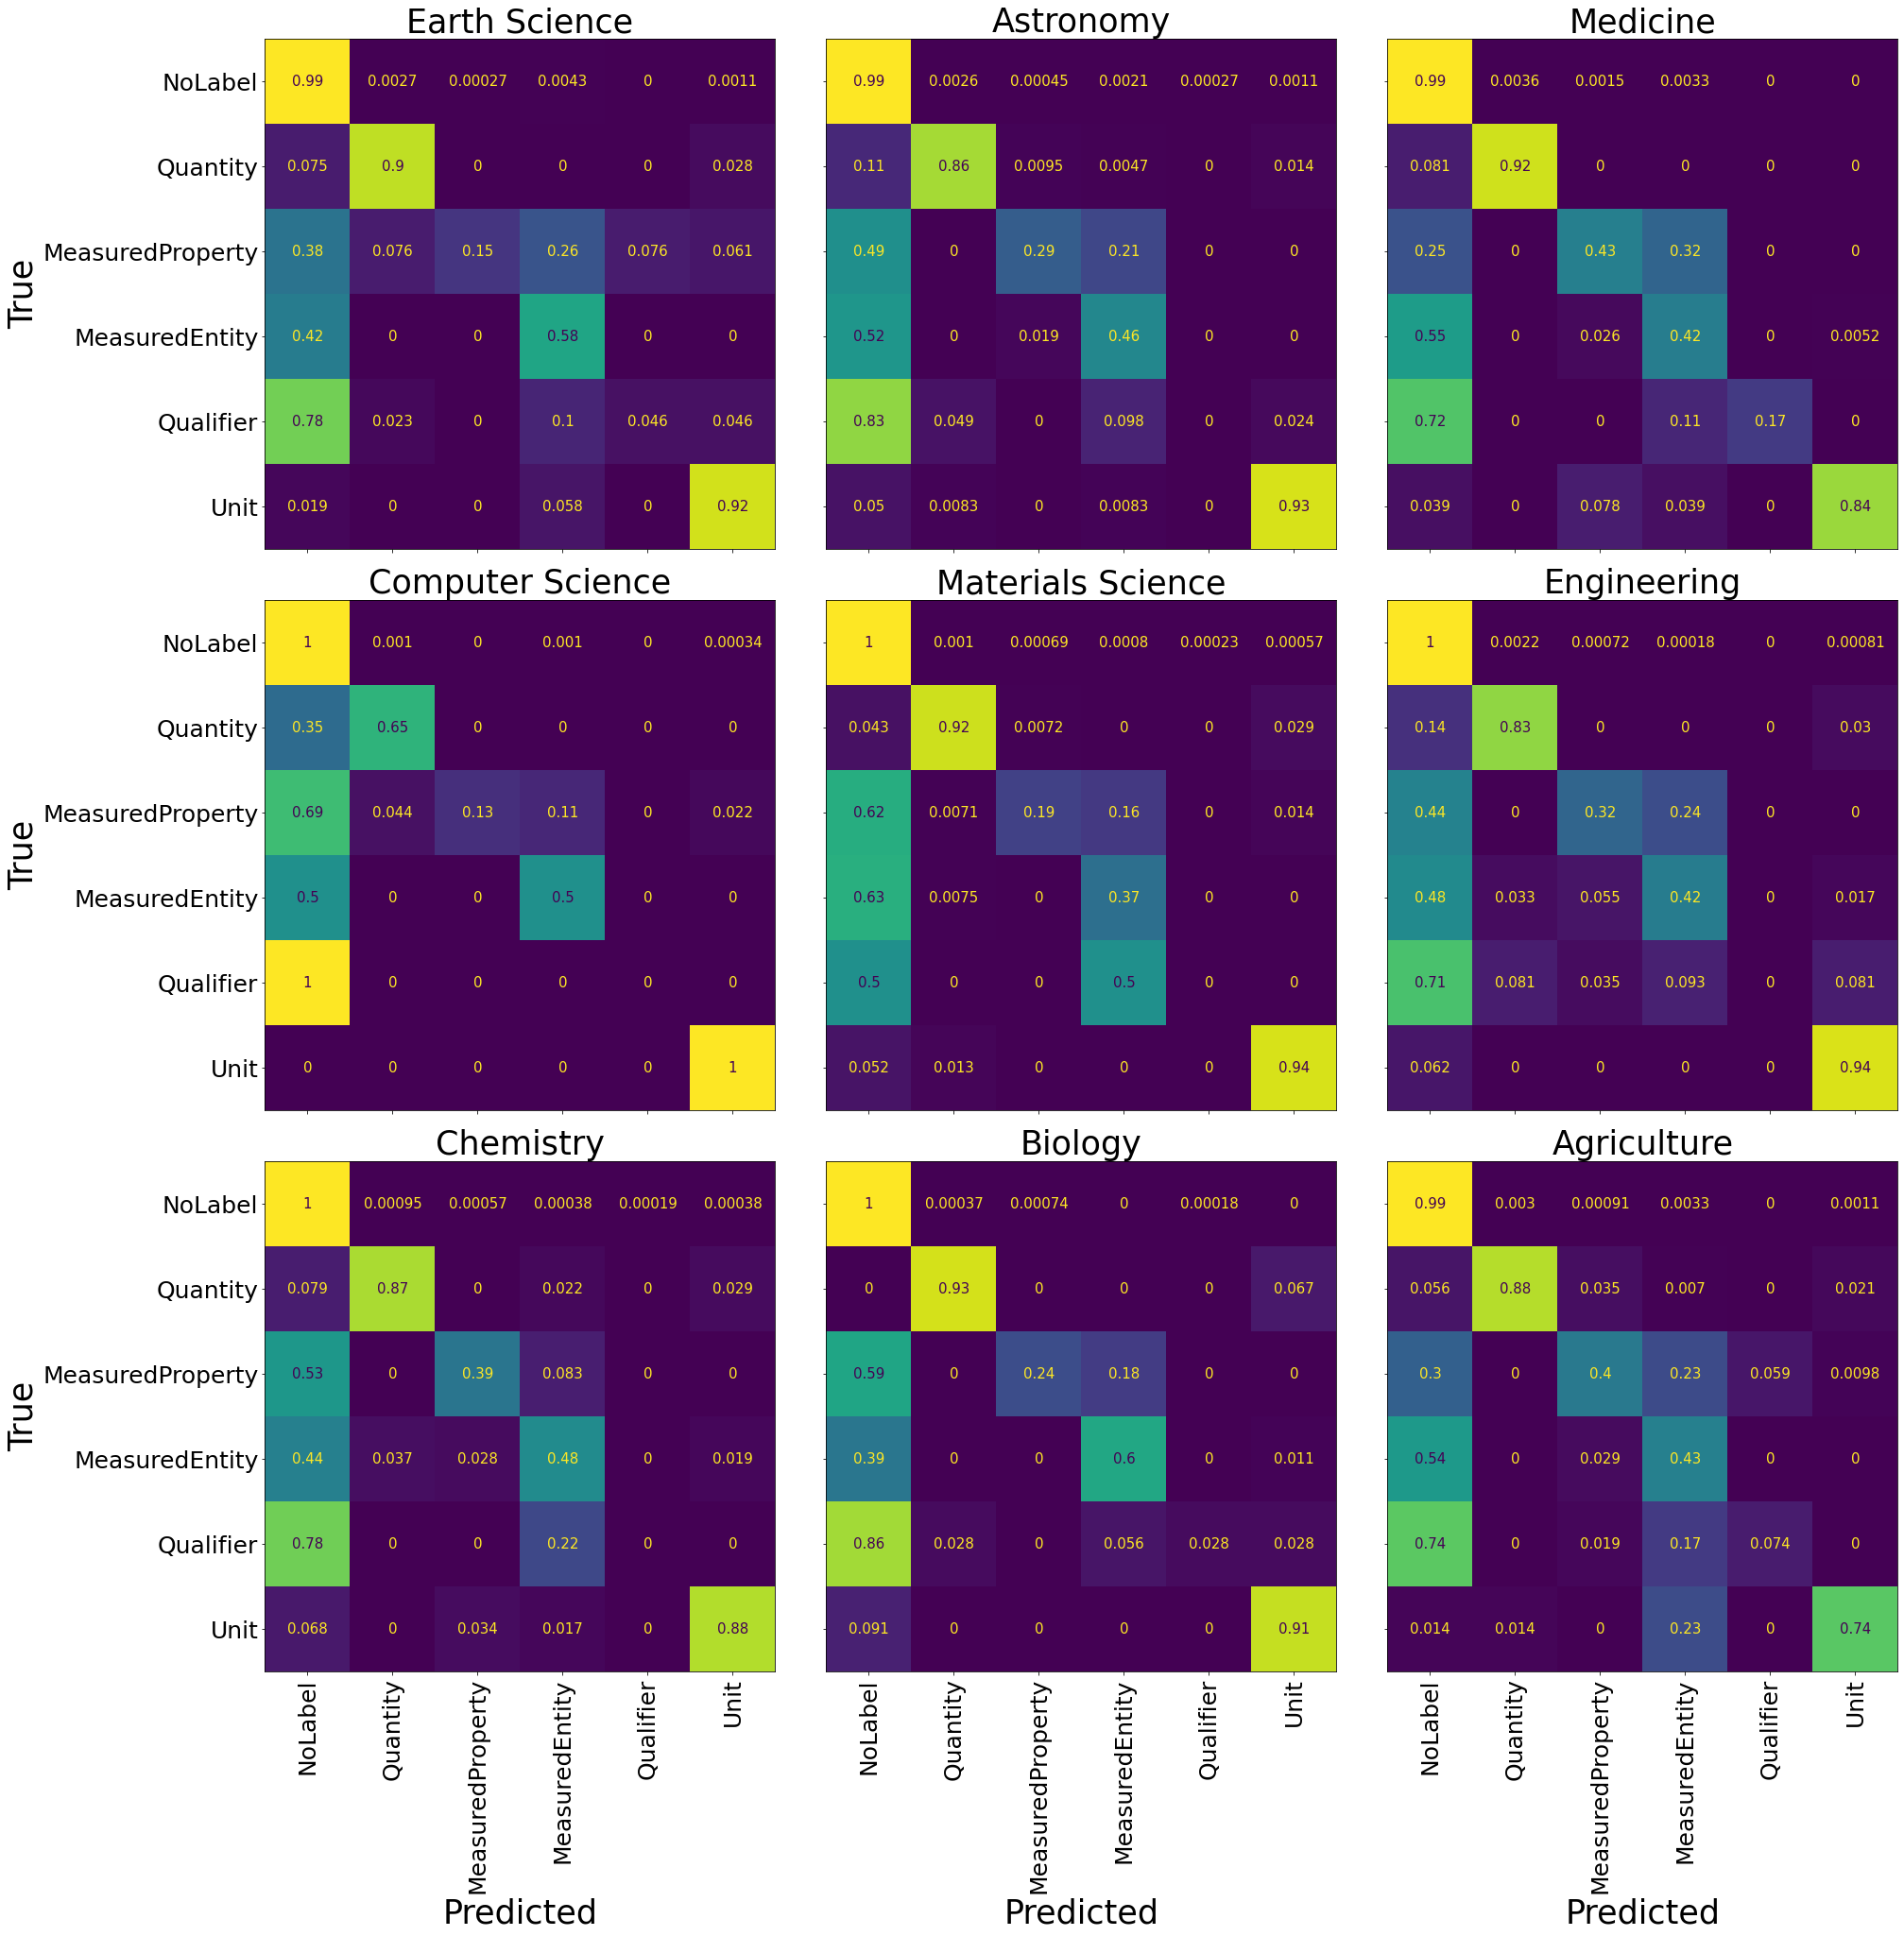

In [17]:
nrows = 3
ncols = 3

fig,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(30,30))

font = {'size' : 15}
plt.rc('font', **font) 

r_ = []
c_ = []
for r in range(nrows):
    for c in range(ncols):
        r_.append(r)
        c_.append(c)
print(r_,c_)

for domain, r, c in zip(cm_list.keys(), r_, c_ ):
    cm_list[domain].plot(ax=ax[r,c])
    ax[r,c].set_title(label=domain,fontdict={'fontsize':35})
    ax[r,c].images[0].colorbar.remove()
    ax[r,c].set_xlabel('Predicted',fontdict={'fontsize':35})
    ax[r,c].set_ylabel('True',fontdict={'fontsize':35})

    if r == nrows - 1:
        ax[r,c].set_xticklabels(labels=tasklabs, rotation=90)
    else:
        ax[r,c].set_xticklabels(labels=[])
        ax[r,c].set_xlabel('')


    if c == 0:
        ax[r,c].set_yticklabels(labels=tasklabs, rotation=0)
    else:
        ax[r,c].set_yticklabels(labels=[])
        ax[r,c].set_ylabel('')

    ax[r,c].tick_params(axis='both', which='major', labelsize=25) 
    

plt.subplots_adjust(left=0.1,
bottom=0.1, 
right=0.9, 
top=0.9, 
wspace=0.1, 
hspace=0.1) 

In [18]:
task_map

{'Quantity': 1,
 'MeasuredProperty': 2,
 'MeasuredEntity': 3,
 'Qualifier': 4,
 'Unit': 5}

In [19]:
rb_base_scores.columns

Index(['cat', 'Quantity_f1', 'Quantity_support', 'MeasuredProperty_f1',
       'MeasuredProperty_support', 'MeasuredEntity_f1',
       'MeasuredEntity_support', 'Qualifier_f1', 'Qualifier_support',
       'Unit_f1', 'Unit_support', 'micro_avg_f1', 'micro_avg_support',
       'macro_avg_f1', 'macro_avg_support', 'weighted_avg_f1',
       'weighted_avg_support'],
      dtype='object')

<AxesSubplot:title={'center':'Qualifier'}, ylabel='category'>

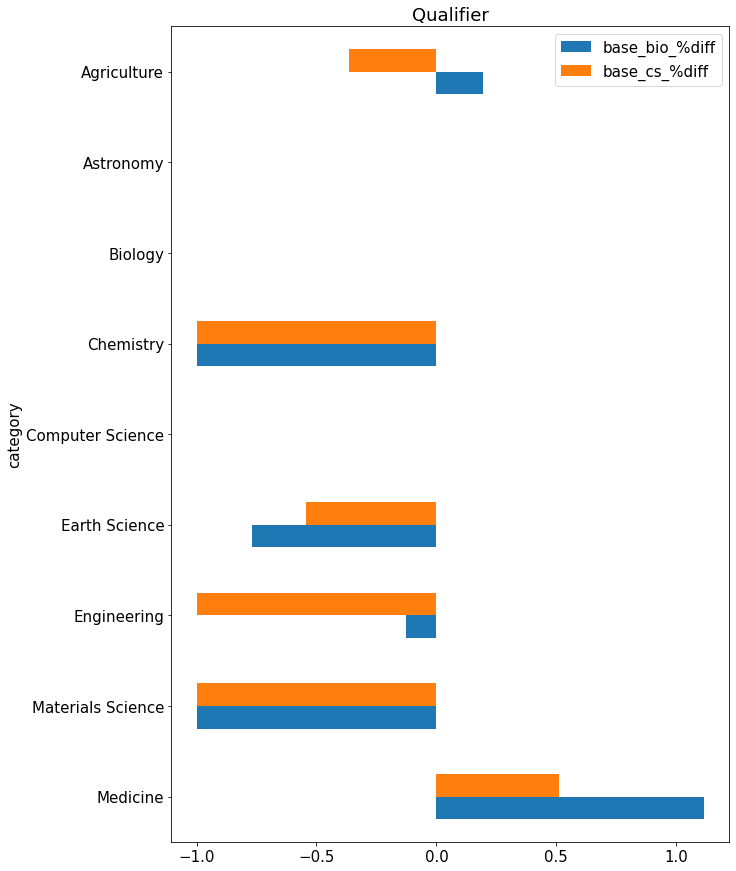

In [20]:
scores_diff = pd.DataFrame()

task = 'Qualifier'

for col in rb_base_scores.columns:
    if col == 'cat' :
        scores_diff['category'] = rb_base_scores[col]
    if col == task+'_f1': 
        scores_diff['base_bio_%diff'] = (rb_bio_scores[col] - rb_base_scores[col]) / rb_base_scores[col]
        scores_diff['base_cs_%diff'] = (rb_cs_scores[col] - rb_base_scores[col]) / rb_base_scores[col]

# for col in rb_base_scores.columns:
#     if col[-2:] == 'f1': 
#         scores_diff['base_cs_%diff'] = (rb_cs_scores[col] - rb_base_scores[col]) / rb_base_scores[col]

scores_diff = scores_diff.set_index('category')
scores_diff.sort_index(inplace=True, ascending=False)
# scores_diff


from matplotlib.pyplot import title, xlabel


scores_diff.plot(kind='barh',figsize=(10,15),title=task)
# plt.figure(figsize=(8, 10))


In [21]:
rb_base_scores['model'] = 'roberta_base'
rb_bio_scores['model'] = 'biomed_roberta_base'
rb_cs_scores['model'] = 'cs_roberta_base'

final_Scores = pd.concat([rb_base_scores,rb_bio_scores,rb_cs_scores])

final_Scores.to_csv('final_scores.csv')

final_Scores



,cat,Quantity_f1,Quantity_support,MeasuredProperty_f1,MeasuredProperty_support,MeasuredEntity_f1,MeasuredEntity_support,Qualifier_f1,Qualifier_support,Unit_f1,Unit_support,micro_avg_f1,micro_avg_support,macro_avg_f1,macro_avg_support,weighted_avg_f1,weighted_avg_support,model
0,Earth Science,0.845070,106,0.453125,66,0.489583,77,0.181818,87,0.852174,52,0.599732,388,0.564354,388,0.560085,388,roberta_base
1,Astronomy,0.824940,211,0.540541,156,0.601542,209,0.000000,82,0.897638,121,0.668975,779,0.572932,779,0.632507,779,roberta_base
2,Medicine,0.895397,123,0.454545,84,0.572668,193,0.192308,47,0.926316,51,0.645355,498,0.608247,498,0.632774,498,roberta_base
3,Computer Science,0.727273,23,0.369231,45,0.561404,34,0.000000,16,0.818182,10,0.517073,128,0.495218,128,0.473533,128,roberta_base
4,Materials Science,0.908425,139,0.352273,140,0.592308,134,0.068966,26,0.943396,77,0.686734,516,0.573073,516,0.638359,516,roberta_base
5,Engineering,0.816327,197,0.514286,68,0.521127,181,0.170213,86,0.868132,81,0.653846,613,0.578017,613,0.611858,613,roberta_base
6,Chemistry,0.831373,139,0.363636,36,0.728111,108,0.296296,23,0.828829,59,0.730769,365,0.609649,365,0.720557,365,roberta_base
7,Biology,0.872727,30,0.190476,17,0.740260,92,0.000000,36,0.897959,22,0.636905,197,0.540284,197,0.595324,197,roberta_base
8,Agriculture,0.833333,143,0.484536,102,0.523179,173,0.197183,54,0.851064,69,0.628514,541,0.577859,541,0.607154,541,roberta_base
0,Earth Science,0.881818,106,0.504854,66,0.500000,77,0.041667,87,0.844828,52,0.615165,388,0.554633,388,0.548580,388,biomed_roberta_base


In [22]:
tasklabs

['NoLabel',
 'Quantity',
 'MeasuredProperty',
 'MeasuredEntity',
 'Qualifier',
 'Unit']

In [23]:
tok = 92375
set([tok])

{92375}

In [24]:
# list(cat_counts.keys())

cat_lab_tokens = pd.DataFrame(index=list(cat_counts.keys()),columns=tasklabs)

# lenif = lambda l : (if isinstance(l,set): len(l))

try: cat_lab_tokens.loc['Chemistry']['Quantity'].add(5677)
except: cat_lab_tokens.loc['Chemistry']['Quantity'] = set([45663])
try: cat_lab_tokens.loc['Chemistry']['Quantity'].add(5677)
except: cat_lab_tokens.loc['Chemistry']['Quantity'] = set([45663])

print(cat_lab_tokens)
cat_lab_tokens.applymap(len, na_action='ignore')

                  NoLabel       Quantity MeasuredProperty MeasuredEntity  \
Medicine              NaN            NaN              NaN            NaN   
Earth Science         NaN            NaN              NaN            NaN   
Chemistry             NaN  {5677, 45663}              NaN            NaN   
Astronomy             NaN            NaN              NaN            NaN   
Computer Science      NaN            NaN              NaN            NaN   
Agriculture           NaN            NaN              NaN            NaN   
Materials Science     NaN            NaN              NaN            NaN   
Mathematics           NaN            NaN              NaN            NaN   
Engineering           NaN            NaN              NaN            NaN   
Biology               NaN            NaN              NaN            NaN   

                  Qualifier Unit  
Medicine                NaN  NaN  
Earth Science           NaN  NaN  
Chemistry               NaN  NaN  
Astronomy              

,NoLabel,Quantity,MeasuredProperty,MeasuredEntity,Qualifier,Unit
Medicine,NaN,NaN,NaN,NaN,NaN,NaN
Earth Science,NaN,NaN,NaN,NaN,NaN,NaN
Chemistry,NaN,2.0,NaN,NaN,NaN,NaN
Astronomy,NaN,NaN,NaN,NaN,NaN,NaN
Computer Science,NaN,NaN,NaN,NaN,NaN,NaN
Agriculture,NaN,NaN,NaN,NaN,NaN,NaN
Materials Science,NaN,NaN,NaN,NaN,NaN,NaN
Mathematics,NaN,NaN,NaN,NaN,NaN,NaN
Engineering,NaN,NaN,NaN,NaN,NaN,NaN
Biology,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
cat_lab_counts = pd.DataFrame(index=list(cat_counts.keys()),columns=tasklabs)
# print(cat_lab_counts)
np.isnan(cat_lab_counts.loc['Chemistry']['Quantity'])
# print(cat_lab_counts)

True

In [26]:


stage1_train_ds = pd.read_pickle(interimpath+'stage1_train_ds.pickle')
stage1_train_ds

# cat_lab_counts = {    
#     'Earth Science':[0]*6,
#     'Biology':[0]*6,
#     'Chemistry':[0]*6,
#     'Astronomy':[0]*6,
#     'Materials Science':[0]*6,
#     'Medicine':[0]*6,
#     'Engineering':[0]*6,
#     'Computer Science':[0]*6,
#     'Agriculture':[0]*6
# }

# cat_lab_tokens = {    
#     'Earth Science':{0:set(),1:set(),2:set(),3:set(),3:set(),5:set(),6:set()},
#     'Biology':{0:set(),1:set(),2:set(),3:set(),3:set(),5:set(),6:set()},
#     'Chemistry':{0:set(),1:set(),2:set(),3:set(),3:set(),5:set(),6:set()},
#     'Astronomy':{0:set(),1:set(),2:set(),3:set(),3:set(),5:set(),6:set()},
#     'Materials Science':{0:set(),1:set(),2:set(),3:set(),3:set(),5:set(),6:set()},
#     'Medicine':{0:set(),1:set(),2:set(),3:set(),3:set(),5:set(),6:set()},
#     'Engineering':{0:set(),1:set(),2:set(),3:set(),3:set(),5:set(),6:set()},
#     'Computer Science':{0:set(),1:set(),2:set(),3:set(),3:set(),5:set(),6:set()},
#     'Agriculture':{0:set(),1:set(),2:set(),3:set(),3:set(),5:set(),6:set()}
# }


cat_lab_counts = pd.DataFrame(index=list(cat_counts.keys()),columns=tasklabs)


cat_lab_tokens = pd.DataFrame(index=list(cat_counts.keys()),columns=tasklabs)
# cat_lab_counts = []
# cat_unique_tokens = []

for idx, doc in stage1_train_ds.iterrows():
    fulldoc = doc['doc_or_sent_id'].split('-')[0]
    cat = doc_categories[fulldoc]
    if cat == 'Mathematics': continue

    for lab, tok in zip(doc['labels'],doc['input_ids']):
        # print(cat_lab_counts.loc[cat][tasklabs[lab]])
        if np.isnan(cat_lab_counts.loc[cat][tasklabs[lab]]):
            cat_lab_counts.loc[cat][tasklabs[lab]] = 1
        else:
            cat_lab_counts.loc[cat][tasklabs[lab]] += 1
        
        if not isinstance(cat_lab_tokens.loc[cat][tasklabs[lab]],set):
            cat_lab_tokens.loc[cat][tasklabs[lab]] = set([tok])
        else:
            cat_lab_tokens.loc[cat][tasklabs[lab]].add(tok)

# print(cat_lab_counts)
# print(cat_lab_tokens)

In [27]:
cat_lab_counts.sum(axis=0)

NoLabel             119374
Quantity              2184
MeasuredProperty      1316
MeasuredEntity        2431
Qualifier              746
Unit                   925
dtype: object

In [29]:
cat_lab_token_ucount = cat_lab_tokens.applymap(len,na_action='ignore')
cat_lab_token_ucount.sum(axis=0)

NoLabel             11600.0
Quantity              956.0
MeasuredProperty      951.0
MeasuredEntity       1568.0
Qualifier             578.0
Unit                  305.0
dtype: float64

In [50]:
round2 = lambda r2 : round(r2, ndigits=2)

labs_per_utok = (cat_lab_counts/cat_lab_tokens).applymap(round2,na_action='ignore').drop('Mathematics').drop('NoLabel',axis=1)

labs_per_utok.to_csv('labs_per_utok.csv')
labs_per_utok

,Quantity,MeasuredProperty,MeasuredEntity,Qualifier,Unit
Medicine,2.06,1.45,1.67,1.25,2.97
Earth Science,2.24,1.31,1.52,1.15,3.72
Chemistry,2.36,1.09,1.32,1.08,2.38
Astronomy,2.17,1.36,1.57,1.54,3.22
Computer Science,1.81,1.21,1.39,1.00,2.42
Agriculture,2.28,1.39,1.46,1.23,2.03
Materials Science,2.16,1.39,1.69,1.08,3.15
Engineering,3.11,1.43,1.60,1.37,3.62
Biology,2.64,1.50,1.59,1.34,3.72


In [31]:
stage1_train_ds = pd.read_pickle(interimpath+'stage1_train_ds.pickle')
stage1_train_ds

cat_lab_counts = pd.Series(index=tasklabs)

cat_lab_tokens = pd.Series(index=tasklabs)

for idx, doc in stage1_train_ds.iterrows():
    fulldoc = doc['doc_or_sent_id'].split('-')[0]
    cat = doc_categories[fulldoc]
    if cat == 'Mathematics': continue

    for lab, tok in zip(doc['labels'],doc['input_ids']):
        # print(cat_lab_counts.loc[cat][tasklabs[lab]])
        if np.isnan(cat_lab_counts[tasklabs[lab]]):
            cat_lab_counts[tasklabs[lab]] = 1
        else:
            cat_lab_counts[tasklabs[lab]] += 1
        
        if not isinstance(cat_lab_tokens[tasklabs[lab]],set):
            cat_lab_tokens[tasklabs[lab]] = set([tok])
        else:
            cat_lab_tokens[tasklabs[lab]].add(tok)

/tmp/ipykernel_7725/1760607562.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cat_lab_counts = pd.Series(index=tasklabs)
/tmp/ipykernel_7725/1760607562.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cat_lab_tokens = pd.Series(index=tasklabs)


In [32]:
cat_lab_counts

NoLabel             119374.0
Quantity              2184.0
MeasuredProperty      1316.0
MeasuredEntity        2431.0
Qualifier              746.0
Unit                   925.0
dtype: float64

In [36]:
cat_lab_counts / cat_lab_tokens.apply(len)

NoLabel             19.247662
Quantity             5.043880
MeasuredProperty     1.724771
MeasuredEntity       1.989362
Qualifier            1.577167
Unit                 5.473373
dtype: float64